Goes straight to pandas df not json

In [1]:
# heroku app name
# shielded-inlet-98365
# import os

In [ ]:
#HERE NEED A HELPER THAT GETS AT LEAST A MONTH SO I CAN SELECT A MONTH FROM IT

In [125]:
 import streamlit as st
# To make things easier later, we're also importing numpy and pandas for
# working with sample data.
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries

import altair as alt


import requests


ts = TimeSeries(key, output_format='pandas')
# data, meta = ts.get_intraday('TSLA', interval='1min', outputsize='full')
# data, meta = ts.get_intraday('GOOG', interval='1min', outputsize='full')
data, meta = ts.get_daily('GOOG', outputsize='full')
# data, meta = ts.get_intraday_extended('TSLA', interval='1min')


In [11]:
meta

{'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
 '2. Symbol': 'TSLA',
 '3. Last Refreshed': '2021-09-09 20:00:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5748 entries, 2021-09-09 20:00:00 to 2021-08-27 04:01:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    5748 non-null   float64
 1   2. high    5748 non-null   float64
 2   3. low     5748 non-null   float64
 3   4. close   5748 non-null   float64
 4   5. volume  5748 non-null   float64
dtypes: float64(5)
memory usage: 269.4 KB


In [119]:
print(data.head(1))
print(data.tail(1))

            1. open  2. high   3. low  4. close  5. volume
date                                                      
2021-09-09  2897.67  2913.39  2888.68   2898.27   739928.0
            1. open  2. high  3. low  4. close  5. volume
date                                                     
2014-03-27    568.0    568.0  552.92    558.46    13100.0


In [130]:
data['year'] = data.index.year
data['month'] = data.index.year

# data[data.index.year== 2020]

In [122]:
# data[data.index.year== 2020]
#set index to column
data.reset_index(level=0, inplace=True)

In [131]:
data.head()
# data[data.date.year]

,1. open,2. high,3. low,4. close,5. volume,year,month
date,,,,,,,
2021-09-09,2897.67,2913.39,2888.68,2898.27,739928.0,2021,2021
2021-09-08,2907.87,2911.02,2884.00,2897.67,774583.0,2021,2021
2021-09-07,2894.99,2916.48,2890.82,2910.38,758630.0,2021,2021
2021-09-03,2882.92,2907.54,2870.10,2895.50,955524.0,2021,2021
2021-09-02,2918.99,2926.50,2882.13,2884.38,1092790.0,2021,2021


## 4.2 Pick a year/month

In [43]:
data[['4. close']]

,4. close
date,
2021-09-09,2898.27
2021-09-08,2897.67
2021-09-07,2910.38
2021-09-03,2895.50
2021-09-02,2884.38
...,...
2014-04-02,567.00
2014-04-01,567.16
2014-03-31,556.97


In [89]:
#year and month selection
data=data[data.index.year == 2020]
data=data[data.index.month == 11]
#keep only closing
data=data[['4. close']]

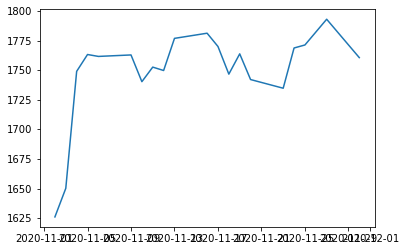

In [45]:
plt.plot(data['4. close'])

In [111]:
# HERE WITH tuples_df ITERATE THRU ROWS TO plot graph
chart = st.line_chart(#year and month selection)

C:\Users\charl\anaconda3\lib\site-packages\streamlit\elements\arrow_altair.py:91: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  chart = _generate_chart(ChartType.LINE, data, width, height)


In [46]:
[-1,:]

SyntaxError: invalid syntax (<ipython-input-46-f1e0740ad7fe>, line 1)

In [67]:
data.iloc[1]

4. close    1793.19
Name: 2020-11-27 00:00:00, dtype: float64

In [72]:
data.iloc[1]

4. close    1793.19
Name: 2020-11-27 00:00:00, dtype: float64

In [73]:
len(data)

20

In [84]:
data['index1'] = data.index

In [117]:
data.head()

,level_0,index,date,4. close,Close
0,0,0,2020-11-30,1760.74,1760.74
1,1,1,2020-11-27,1793.19,1793.19
2,2,2,2020-11-25,1771.43,1771.43
3,3,3,2020-11-24,1768.88,1768.88
4,4,4,2020-11-23,1734.86,1734.86


## mod df for plotting

In [111]:
#set index to column
data.reset_index(level=0, inplace=True)
#rename the 4. close column to something plottable
data=data.assign(Close=pd.to_numeric(data['4. close']))

In [116]:
data[data.index.year]

AttributeError: 'RangeIndex' object has no attribute 'year'

In [113]:
alt.Chart(data).mark_line().encode(
  x=('date'),
  y=('Close')
)

alt.Chart(...)